# Import

In [1]:
!pip install imutils

  Preparing metadata (setup.py) ... - \ done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=42419036052226c926113ad9ea91aa6b127911dfc15f3a78a499ec6feb85c080
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [2]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils
import random

import matplotlib.pyplot as plt

# Define functions

In [3]:
def crop_img(img):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    
    return new_img

# Visualize Samples

In [4]:
root_folder_path = '/kaggle/input/brain-tumor-mri-dataset/Training'

In [5]:
labels = os.listdir(root_folder_path)

In [6]:
img_paths = []
for label in labels:
    label_path = os.path.join(root_folder_path, label)
    imgs = os.listdir(label_path)
    selected_img = random.choice(imgs)
    selected_img_path = os.path.join(label_path, selected_img)
    img_paths.append(selected_img_path)
    

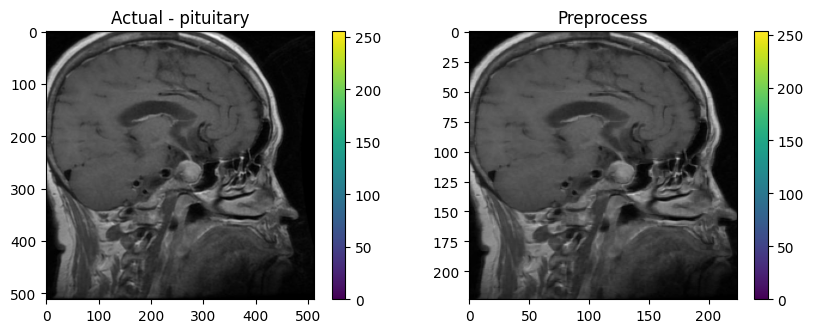

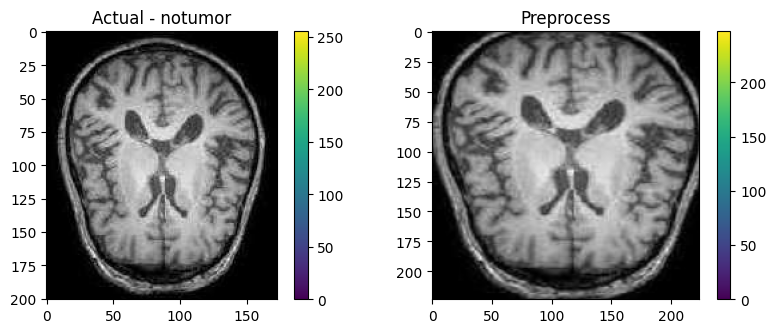

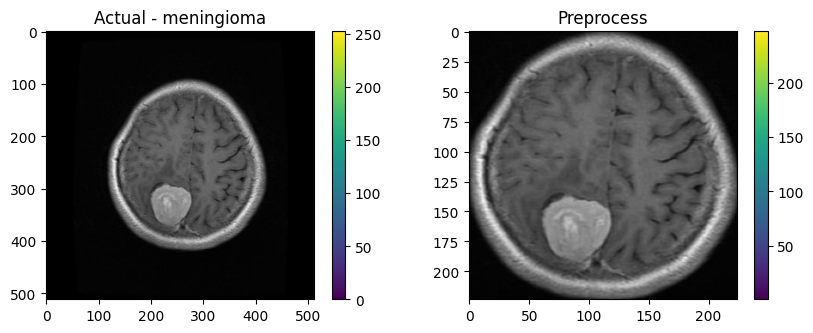

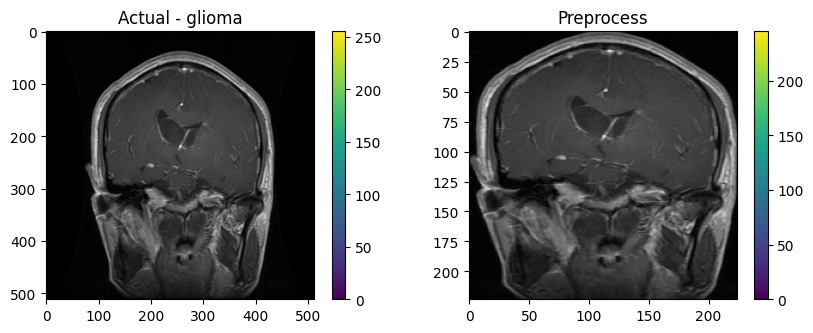

In [7]:
for i, img_path in enumerate(img_paths):

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig = plt.figure(figsize=(10, 16))
    rows = len(labels)
    ax = fig.add_subplot(rows, 2, 2 * i + 1)
    ax.title.set_text("Actual - " + labels[i])
    plt.imshow(img)
    plt.colorbar()
    
    new_img = crop_img(img)
    new_img = cv2.resize(new_img,(224, 224))
    ax1 = fig.add_subplot(rows, 2, 2 * i + 2)
    ax1.title.set_text("Preprocess")
    plt.imshow(new_img)
    plt.colorbar()
    
plt.show()

In [8]:
training = "/kaggle/input/brain-tumor-mri-dataset/Training"
testing = "/kaggle/input/brain-tumor-mri-dataset/Testing"
training_dir = os.listdir(training)
testing_dir = os.listdir(testing)
IMG_SIZE = 224

for dir in tqdm(training_dir):
    save_path = '/kaggle/working/Training/' + dir
    path = os.path.join(training, dir)
    image_dir = os.listdir(path)
    for img in image_dir:
        image = cv2.imread(os.path.join(path, img))
        new_img = crop_img(image)
        new_img = cv2.resize(new_img,(IMG_SIZE, IMG_SIZE))
        os.makedirs(save_path, exist_ok=True)
        cv2.imwrite(save_path + '/' + img, new_img)

for dir in tqdm(testing_dir):
    save_path = '/kaggle/working/Testing/' + dir
    path = os.path.join(testing, dir)
    image_dir = os.listdir(path)
    for img in image_dir:
        image = cv2.imread(os.path.join(path, img))
        new_img = crop_img(image)
        new_img = cv2.resize(new_img,(IMG_SIZE, IMG_SIZE))
        os.makedirs(save_path, exist_ok=True) 
        cv2.imwrite(save_path + '/' + img, new_img)

100%|██████████| 4/4 [00:14<00:00,  3.56s/it]
